In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from scipy.io import loadmat

MAP_PREFIX = "Salinas"
DICT_ENTRY_PREFIX = "salinas" # Usually It's the map name camelcased

data = loadmat('Data/%s.mat'%(MAP_PREFIX))[DICT_ENTRY_PREFIX]
data_gt = loadmat('Data/%s_gt.mat'%(MAP_PREFIX))[DICT_ENTRY_PREFIX+'_gt']

In [3]:
def show_map(data, data_gt, sample=5):
    '''
        Plot random different channel of the map, along side the ground truth
    '''
    plt.figure(figsize=(15,15))
    from random import randint
    for idx in range(0, sample):
        channel = randint(0, data.shape[2])
        plt.subplot(1, sample + 1, idx + 1).set_title("Channel: %d"%(channel))
        plt.imshow(data[:,:,channel], cmap='gray')    
    plt.subplot(1, sample + 1, sample + 1).set_title("Ground Truth")
    plt.imshow(data_gt, cmap='jet')
    plt.show()

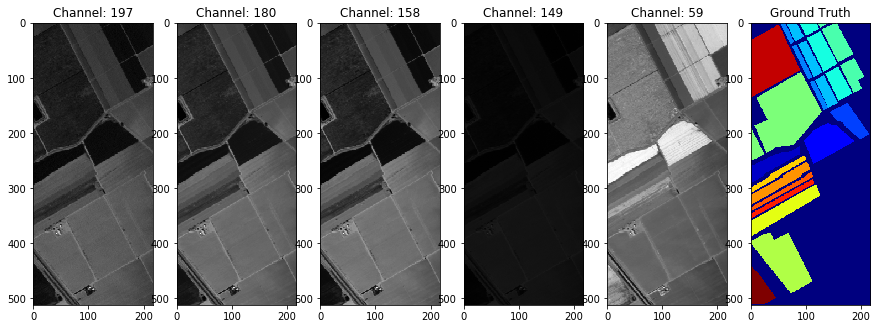

In [4]:
show_map(data, data_gt)

In [5]:
length, width, channel = data.shape

In [6]:
from sklearn.preprocessing import OneHotEncoder

X = data.reshape(-1, channel)
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(data_gt.reshape(-1, 1))

In [7]:
def sample_data(X, y, p=0.01):
    total_size = X.shape[0]
    import math
    sample_size = math.floor(total_size * p)
    idxs = np.random.randint(total_size, size=sample_size)
    return X[idxs], y[idxs]

In [8]:
X_sample, y_sample = sample_data(X, y, 0.5)

In [9]:
from sunsal import SunSALClassifier

clf = SunSALClassifier()
clf.fit(X_sample, y_sample)

i = {:d}, res_p = {:f}, res_d = {:f}



AttributeError: 'NoneType' object has no attribute 'format'

In [10]:
pred = clf.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y.argmax(axis=1), pred.argmax(axis=1))
score_ = accuracy_score(y.argmax(axis=1), pred.argmax(axis=1))

In [12]:
score_

0.7547073012672811

In [13]:
pred_2d = pred.argmax(axis=1).reshape(length, width)

In [14]:
def plot_prediction(gt, pred):
    plt.subplot(1, 2, 1).set_title('Ground Truth');
    plt.imshow(gt, cmap='jet')
    plt.subplot(1, 2, 2).set_title('Prediction');
    plt.imshow(pred, cmap='jet')
    plt.show()

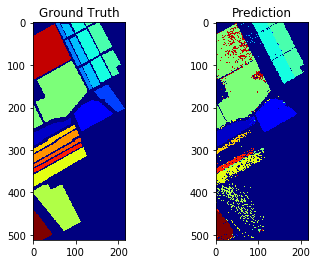

In [15]:
plot_prediction(data_gt, pred_2d)